# Problem Statement

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 
Data set - https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

# Importing Base Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from statistics import mode

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head() #first 5 rows of data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring Dataset

In [3]:
df.shape

(891, 12)

Observation - Dataset is containing total of 891 rows and 12 columns

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Columns Description -

#Feature Columns:
- PassengerId : Passenger unique ID on the ship
- Pclass : Passenger Ticket Class
- Name - Passenger Name
- Sex : Sex of Passengers
- Age : Age of Passengers
- sibsp : Number of siblings / spouses onboard
- Parch : Number of parents / children onboard
- Ticket : Ticket Number
- Fare : Ticket Fare
- Cabin : Cabin's number
- Embarked: Port from which the passenger Embarked

#Target Column:
- Survived: Passenger Survived or not

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observation-
- PassengerId, Survived, Pclass, SibSp, Parch are integer type numerical Columns
- Name, Sex Ticket, Cabin and Embarked are object data type in which Name is of string type, Sex and Embarked is categorical, Ticket is string data
- Age and Fare are of float type
- There are total 891 entries in data, for few columns data is undefined, will explore that in detail now

# Null Value/Missing Data Analysis

As, we can see there are a lot of undefined values in data set, This analysis is to figure out if data contains any undefined or null value

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observation - 
- Age column is having 177 undefined data values, should replace this with mean value
- Cabin is having 687 undefined entries which is a huge number, so better to drop this column
- Embarked is a categorical data column and having 2 undefined values, will replace these with mode 

# Handling Missing Data

# 1) Handling Age

In [7]:
mean_value = df['Age'].mean() #will replace the missing value in age by Mean value
df['Age'].fillna(value = mean_value,inplace = True)

# 2) Handling Embarked

In [8]:
mode_value = df['Embarked'].mode()[0] #will replace the missing values in the embarked field with Mode as this is the categorical data
df['Embarked'].fillna(value = mode_value,inplace = True)

# 3) Dropping Cabin Column

Dropping Cabin Column Because mojority of rows are missing this data. Imputing some data to these missing values will only mis-lead the model

In [9]:
df.drop(['Cabin'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# Removing Unnecessary Columns

By analysing the dataset we can say that some columns will not play any significant role in training prediction model as
- Ticket - This number is diffrent for every passenger and will not play any role in describing whether a passenger will survive or not
- PassengerId - this is the unique id alotted to every passenger which will also not play any significant role in deciding the survival or passenger
- Passenger Name - we can drop this row also as this dosn't play any role in passenger survival

In [10]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


# Checking Missing Data Again

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Observation - There is no missing data in data set now.

# Zero Value Analysis

In [12]:
(df==0).sum()

Survived    549
Pclass        0
Sex           0
Age           0
SibSp       608
Parch       678
Fare         15
Embarked      0
dtype: int64

Observation - The columns showing zero value can genuinely have zero value, so we don't need to operate zero values

# Discriptive Analysis

In [13]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


Description -
- Survived - This Column contains Binary value 0,1 which represents passenger survived or not. 0-not survive, 1- survive
- Pclass - There are 3 values in this column - 1,2,3 where 1-High class, 2 - middle class and 3 - low class, min value = 1, max value = 3, 50% of passengers were travelling in middle class or low class
- Sex - There are only two unique values Male, Female, male count was 577 passengers out of 891 were male
- Age - min age was 0.4 means 3 months old baby, max age was 80, 75% of passengers were having age below 35 years
- SibSP - This is telling about no. of siblings/spouses onboard, min was 0 and max was 8, 75% of passengers were having no. of siblings below 1
- Parch - This is telling about no. of parents and children, min was 0, max was 6, 75% of passenger were not having any parent or child onboard
- Fare - This is telling about the fare paid for boarding the ship, min was 0, max was 512 dollars, 75% passenges paid fair below 31 dollars
- Embarked - This is telling about embarkment point, there were 3 embarkment points C = Cherbourg, Q = Queenstown and S = Southampton. Highest no. of passengers 646 onboarded from S(Southampton)

# Interpreting Relation between Target and Feature Variables

In [14]:
#separating the Features and Target Variable
x = df.drop(columns = ['Survived']) #feature variables
y = df['Survived'] #target variable

# Analysing Traget Variable

In [15]:
y.nunique() #number of unique values

2

In [16]:
y.unique()

array([0, 1], dtype=int64)

Observation - There are two unique values 0,1

In [17]:
y.value_counts() #representing the frequency of unique entries under target column 

0    549
1    342
Name: Survived, dtype: int64

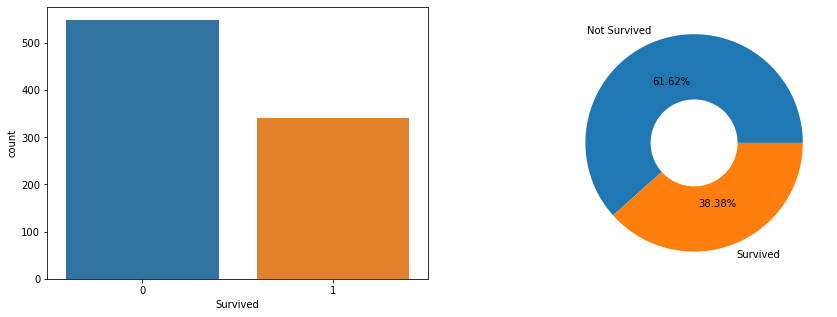

In [18]:
#lets plot the Survival count
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(y) #plotting the count for each unique entry under target variable

plt.subplot(1,2,2)
labels = 'Not Survived','Survived'
plt.pie(y.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 61.62% of the total passengers didn't survived while 38.38% survived

# Analysing Feature Variables

Lets start with categorical Features Pclass, Sex and Embarked

1) Pclass 

In [19]:
df['Pclass'].nunique() #number of unique values

3

In [20]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [21]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

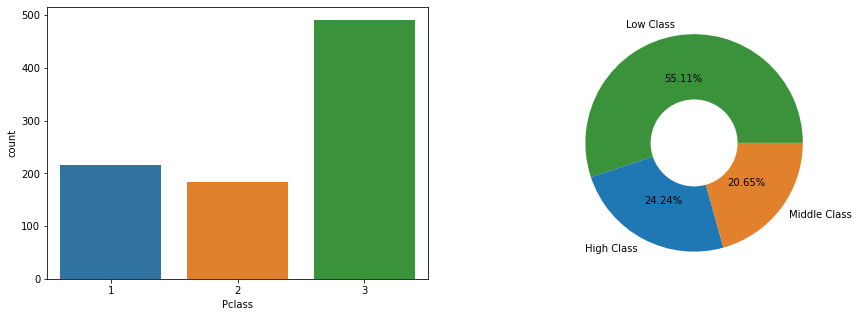

In [22]:
#lets plot the Passenger Class count
plt.figure(figsize=(15,5))
colors = ['#3a923a','#1f77b4','#e1812c']

plt.subplot(1,2,1)
sns.countplot(df['Pclass']) #plotting the count for each unique entry under feature variable

plt.subplot(1,2,2)
labels = 'Low Class','High Class','Middle Class'
plt.pie(df['Pclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', colors = colors)
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 
- There were 3 classes High, Middle and Low
- 55% passengers were travelling in Low class
- 24.2% passengers were travveling in high class
- 20.6% people were travelling in Middle class

2) Analysing Sex

In [23]:
df['Sex'].nunique() #number of unique values

2

In [24]:
df['Sex'].unique() # unique values

array(['male', 'female'], dtype=object)

In [25]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

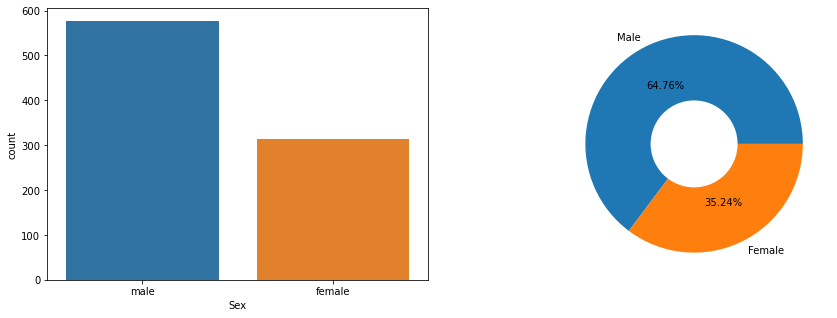

In [26]:
#lets plot the Sex count
plt.figure(figsize=(15,5))
#colors = ['#3a923a','#1f77b4','#e1812c']

plt.subplot(1,2,1)
sns.countplot(df['Sex']) #plotting the count for each unique entry under feature variable

plt.subplot(1,2,2)
labels = 'Male','Female',
plt.pie(df['Sex'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation -
- There were 2 sex categories Male , Female
- Higher number of passengers were men 64.76%
- There were 35.24% female passengers onboarded

3) Analysing Embarkment

In [27]:
df['Embarked'].nunique() #number of unique values

3

In [28]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

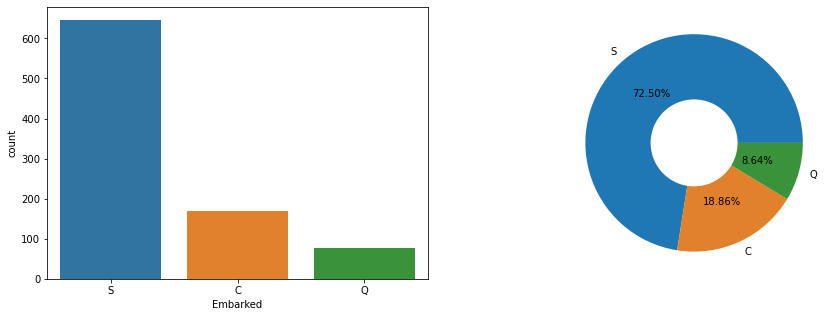

In [30]:
#lets plot the Embarkments 
plt.figure(figsize=(15,5))
colors = ['#1f77b4','#e1812c','#3a923a']

plt.subplot(1,2,1)
sns.countplot(df['Embarked']) #plotting the count for each unique entry under feature variable

plt.subplot(1,2,2)
labels = 'S','C','Q'
plt.pie(df['Embarked'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', colors = colors)
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation -
- There were 3 embarkment Ports S,C,Q
- 72.5% passengers embarked from S
- 18.86% passengers embarked from C
- 8.64% passengers embarked from Q

# Analysing the variation of Target(Survival) wrt all Features

1) Analysing wrt sex as a hue (not considering Age and Fare)

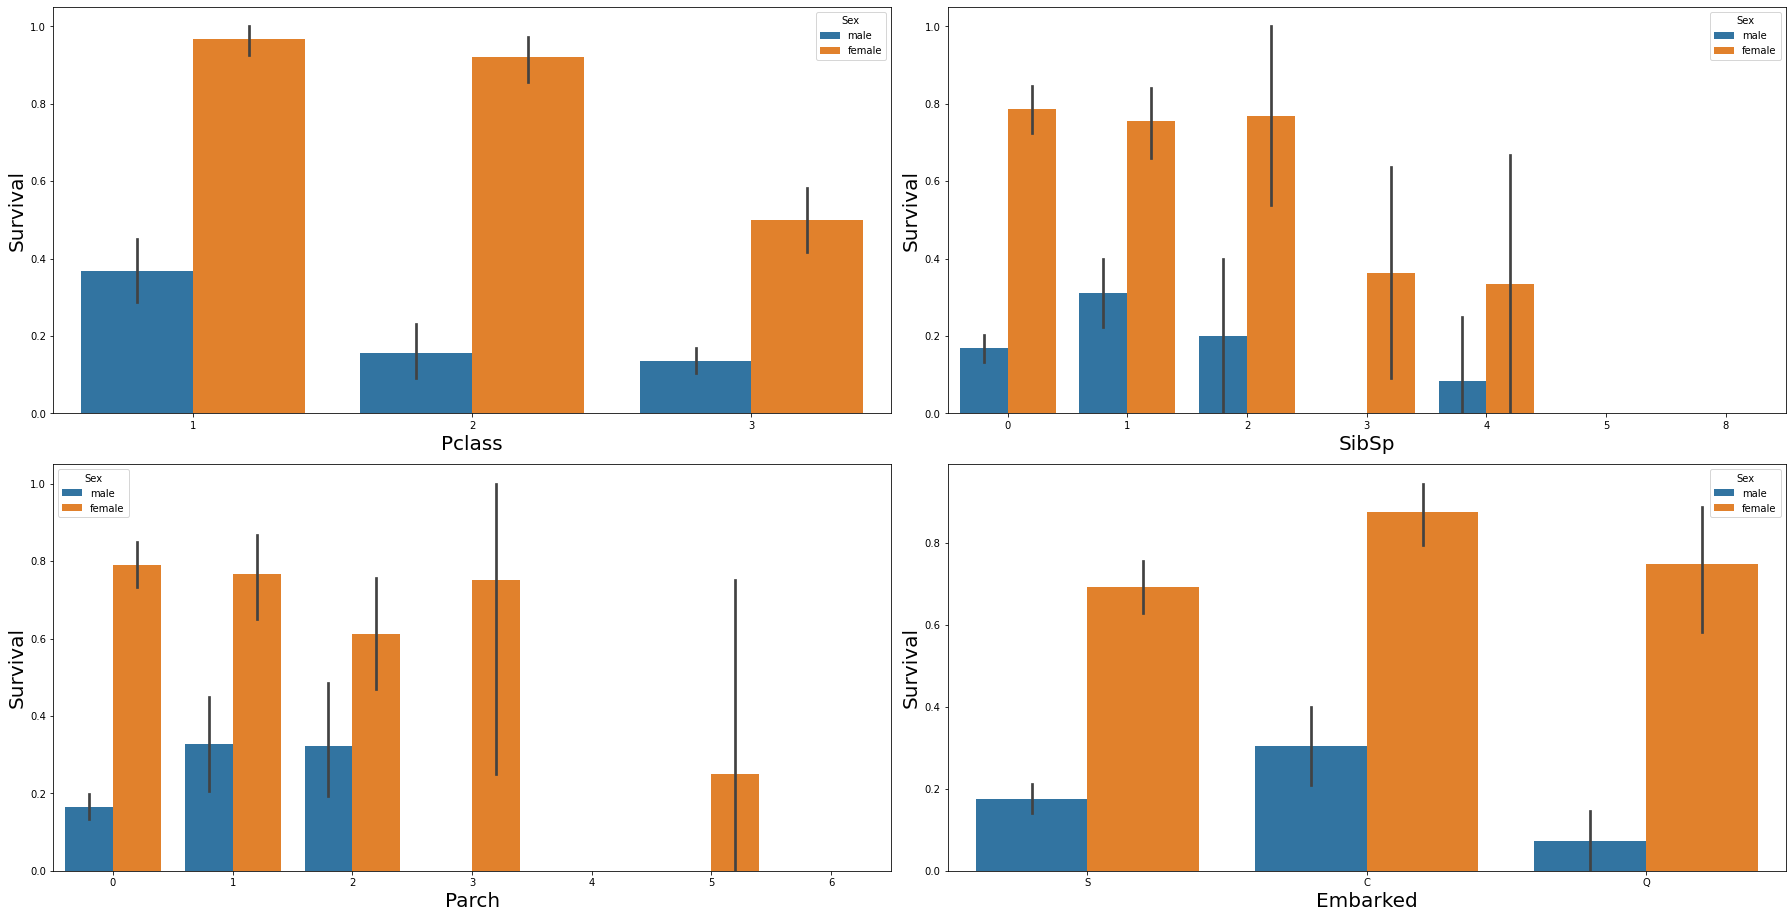

In [31]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in x:
    if (col != 'Sex' and col != 'Age' and col != 'Fare'):
        if plotnum<=7:
            plt.subplot(4,2,plotnum)
            sns.barplot(x[col],y,hue=df['Sex'])
            plt.ylabel('Survival',fontsize=20)
            plt.xlabel(col,fontsize=20)
        plotnum+=1
plt.tight_layout()

Observation -
- More of the passengers survived from Class 1 (High class)
- Passengers with less number of sibling/spouse onboarded had higher survival count
- Passenger with less parent/children onboarded had higher survival count
- Passengers boarded from C embarkment had higher survival count

2) Analysing wrt Pclass as a hue (not considering Age and Fare)

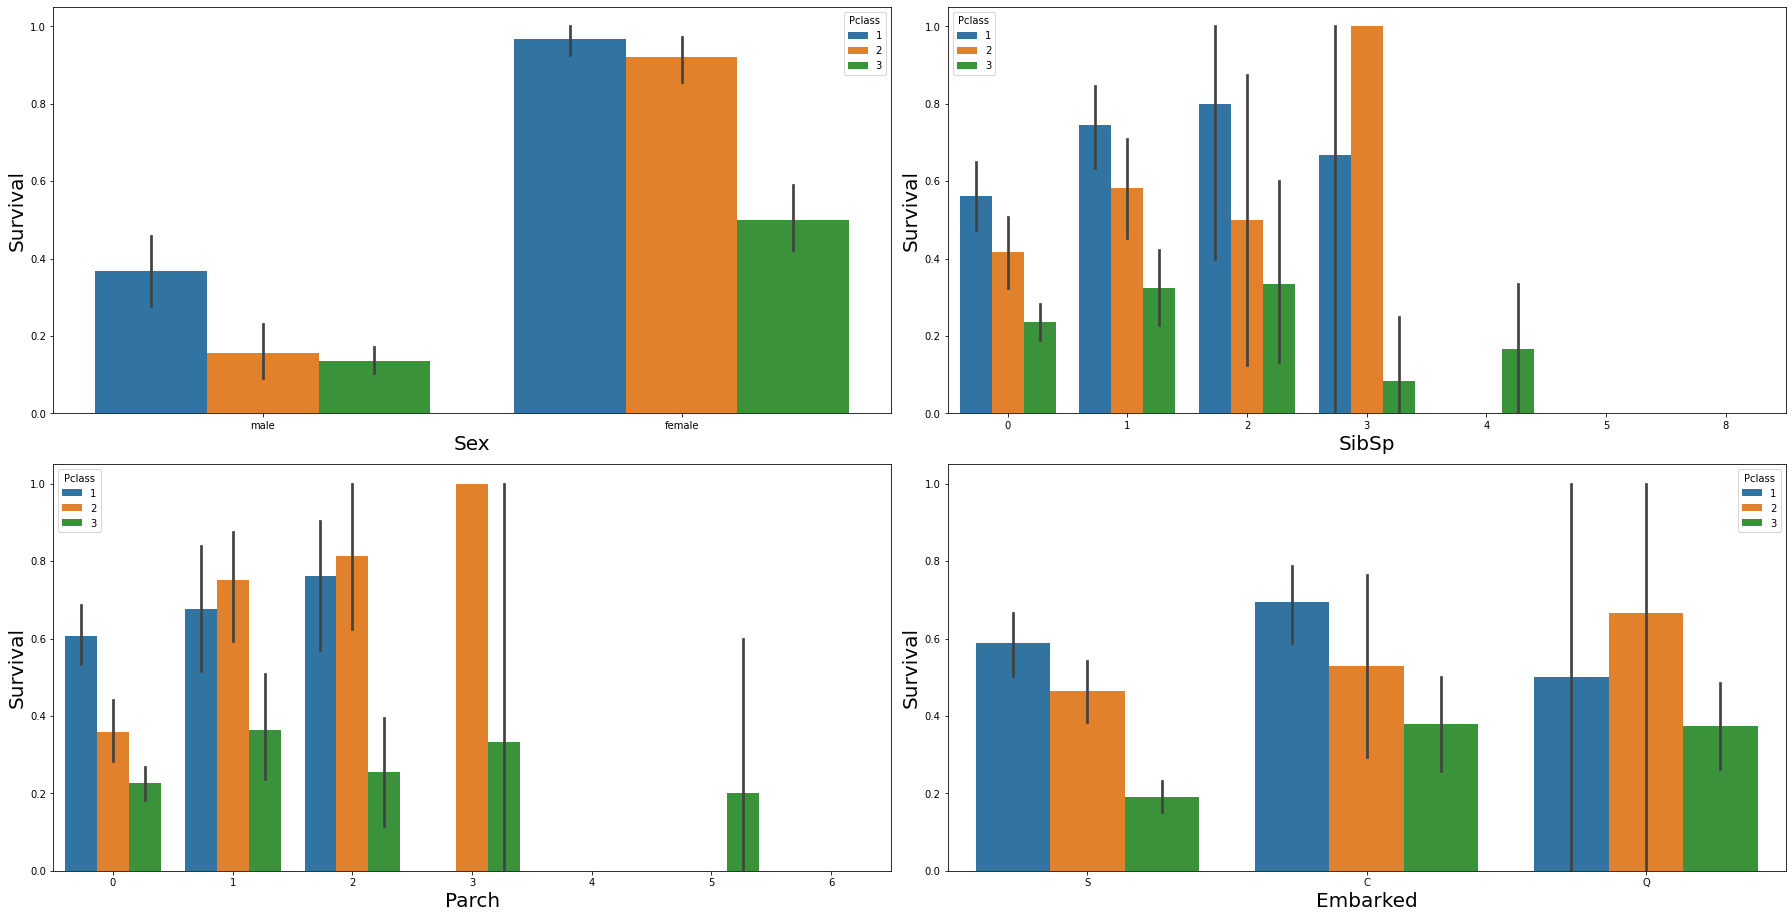

In [32]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in x:
    if (col != 'Pclass' and col != 'Age' and col != 'Fare'):
        if plotnum<=7:
            plt.subplot(4,2,plotnum)
            sns.barplot(x[col],y,hue=df['Pclass'])
            plt.ylabel('Survival',fontsize=20)
            plt.xlabel(col,fontsize=20)
        plotnum+=1
plt.tight_layout()

Observation - 
- Higher number of female survived that too from high class 
- Most of the high class passenger survived with lower count of sibling/spouse
- More of the Middle class passenger survived with lower count of parents/children
- Nothing much significant can be concluded from embarkment, less number of low class passenger survived from who onboarded from all 3 embarkments

3) Analysing wrt Embarked as a hue (not considering Age and Fare)

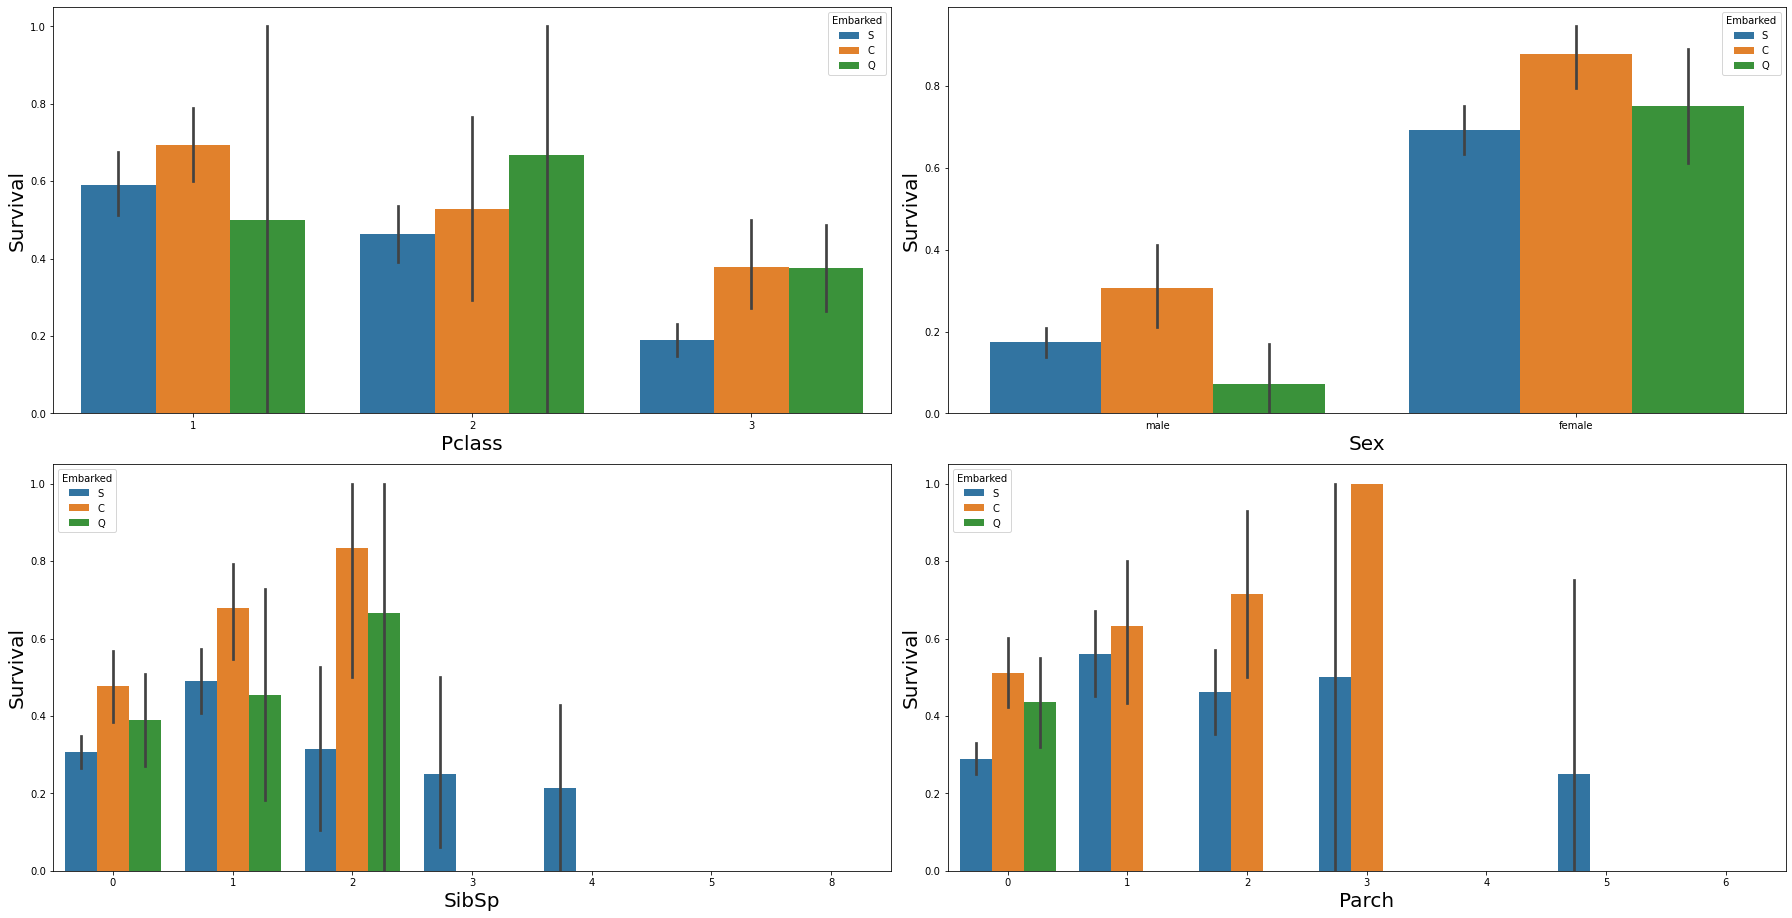

In [33]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in x:
    if (col != 'Embarked' and col != 'Age' and col != 'Fare'):
        if plotnum<=7:
            plt.subplot(4,2,plotnum)
            sns.barplot(x[col],y,hue=df['Embarked'])
            plt.ylabel('Survival',fontsize=20)
            plt.xlabel(col,fontsize=20)
        plotnum+=1
plt.tight_layout()

Observations - 
- More of the middleclass passenger onboarded from Q, more of the high class passenger onboarded from S and most of the low class passenger onboarded from C,Q
- Most of passengers that survived were females, most of them onboarded from all three ports
- Passenger onboarded from port C, having less number of siblings/spouse survived more
- Only the passenger onboarded from port Q were having no parent/child.

4) Analysing Survival wrt the Age and Fare

<AxesSubplot:title={'center':'Comparision between Age and Fare'}, xlabel='Age', ylabel='Fare'>

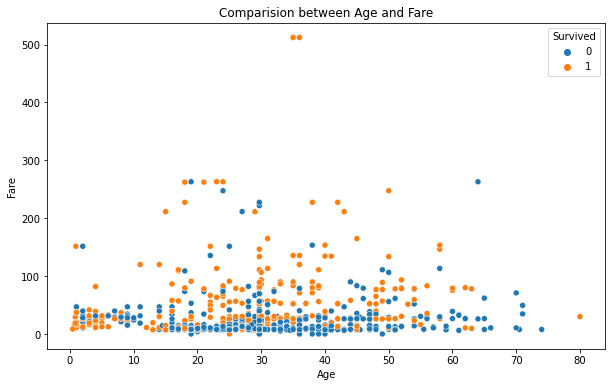

In [34]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Fare')
sns.scatterplot(x['Age'],x['Fare'],hue=y)

Observation - 
- Passenger who paid higher survived
- Passengers having lower age survived 

5) Analysing Age and Fare wrt sex

<AxesSubplot:title={'center':'Comparision between Age and Fare'}, xlabel='Age', ylabel='Fare'>

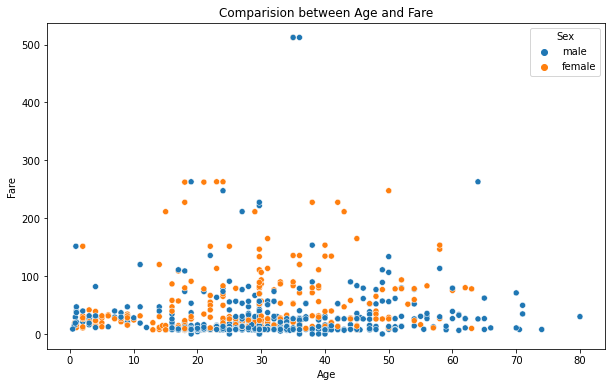

In [35]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Fare')
sns.scatterplot(x['Age'],x['Fare'],hue=x['Sex'])

Observation - More number of female paid higher fare as compared to men and their age was lying between (0-65)

6) Analysing Age and Fare wrt Pclass

<AxesSubplot:title={'center':'Comparision between Age and Fare'}, xlabel='Age', ylabel='Fare'>

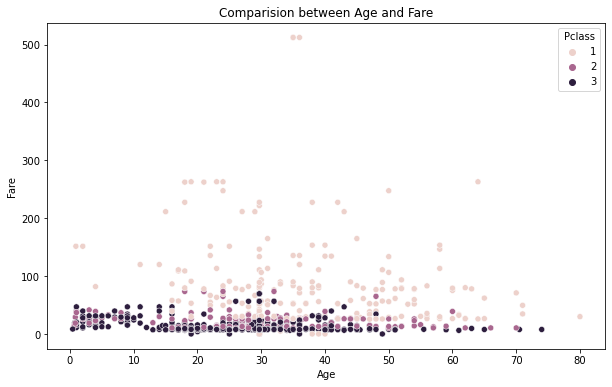

In [36]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Fare')
sns.scatterplot(x['Age'],x['Fare'],hue=x['Pclass'])

Observation - Class 1 passenger paid higher fare while the middle class and lower class passenger paid lower fare

7) Analysing Age and Fare wrt Embarked

<AxesSubplot:title={'center':'Comparision between Age and Fare'}, xlabel='Age', ylabel='Fare'>

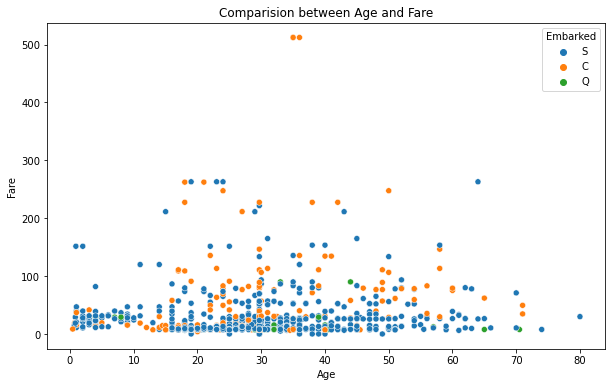

In [37]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Fare')
sns.scatterplot(x['Age'],x['Fare'],hue=x['Embarked'])

Observation - Most of the passenger who paid higher Fare onboarded from S and C

# Visualizing all data together

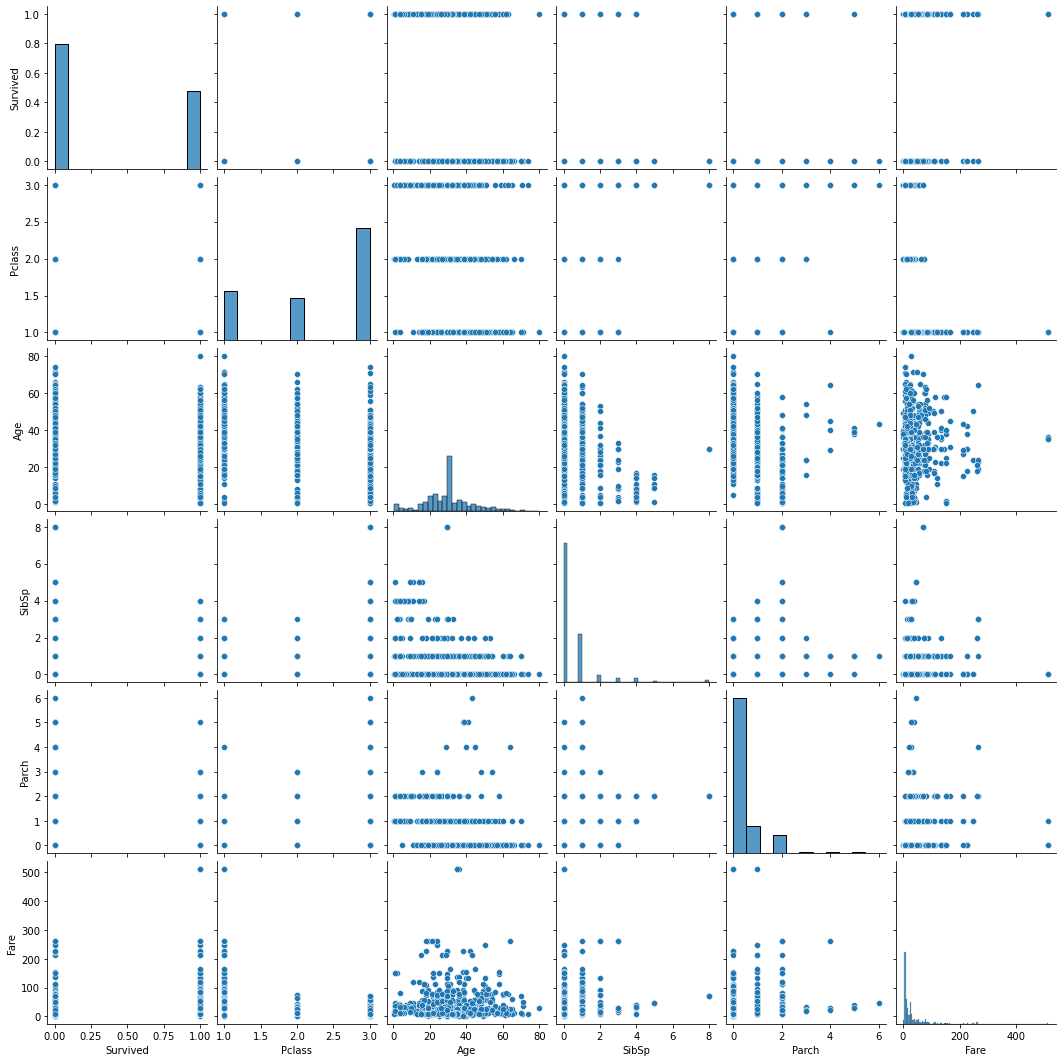

In [38]:
sns.pairplot(df)

# Label Encoding to encode Sex 

In [39]:
#as there are only two values in Sex column male, female so choosing label encoding method

#make a deep copy of the data frame
df_enc = df.copy(deep=True)

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Sex'. 
df_enc['Sex']= label_encoder.fit_transform(df_enc['Sex']) 

df_enc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


# One Hot encoding using get_dummies method for Embarked

Choosing dummies method to encode embarked column because it consist of more than 2 values S,C,Q

In [40]:
dummy = pd.get_dummies(df_enc['Embarked'],drop_first = False)
df_enc = df_enc.join(dummy)
df_enc.drop(columns = ['Embarked'],axis = 1, inplace = True)
df_enc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


# Finding Correlation

In [41]:
#lets find out the correlation between the columns
df_enc.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.019336
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
C,0.168240,-0.243292,-0.082853,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Q,0.003650,0.221009,-0.074115,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421
S,-0.149683,0.074053,0.119224,-0.019336,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000


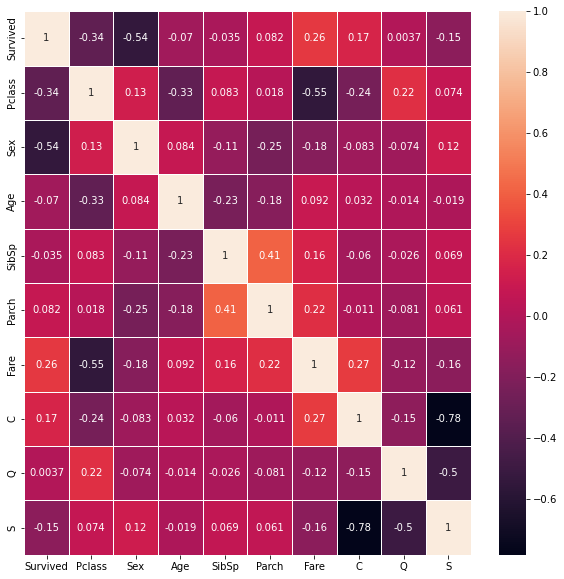

In [42]:
#lets plot the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df_enc.corr(),annot=True,linewidth=1)
plt.show()

Observation - There is no much correlation in between the feature variables. Lets find out the bond strength between the target and features

In [43]:
#lets find out the correlation of Feature variables with target variable 
df_enc.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
S          -0.149683
Age        -0.069809
SibSp      -0.035322
Q           0.003650
Parch       0.081629
C           0.168240
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

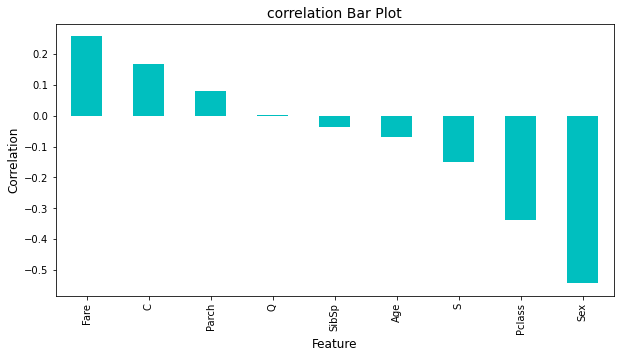

In [44]:
#Plotting the correlation
plt.figure(figsize=(10,5))
df_enc.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar' ,color='c')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot',fontsize=14)
plt.show()

Observation - most of the columns are -vely correlated to Target
- sex is 54% negatively correlated to target which is a strong bond
- Pclass is 34% -vely correlated to target which is a strong bond
- S is 15% -vely correlated which is good bond
- Age, SibSp, Q and Parch are having weak bond
- C is having 17% +ve correlation which is a good bond
- Fare is 26% +vely correlated which is a good bond

# Detecting Multicollinearity with VIF and Data Cleaning

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

vif_data["feature"] = df_enc.columns
vif_data["VIF"] = [variance_inflation_factor(df_enc.values, i) for i in range(len(df_enc.columns))]
print(vif_data)

    feature        VIF
0  Survived   1.661651
1    Pclass   1.912449
2       Sex   1.533669
3       Age   1.252545
4     SibSp   1.297053
5     Parch   1.333589
6      Fare   1.650814
7         C   8.738456
8         Q   5.205782
9         S  31.109434


VIF values ranging between 1 and 10 are moderate. They represent a medium level of collinearity. Values of more than 10 are highly collinear.

Observation-

As VIF score for S is quite high, Lets drop that column and check VIF again

In [46]:
# VIF dataframe
vif_data1 = pd.DataFrame()

df_enc.drop(['S'],axis=1, inplace=True)

vif_data1["feature"] = df_enc.columns
vif_data1["VIF"] = [variance_inflation_factor(df_enc.values, i) for i in range(len(df_enc.columns))]
print(vif_data1)

    feature       VIF
0  Survived  1.969830
1    Pclass  5.574900
2       Sex  3.670230
3       Age  4.565677
4     SibSp  1.572401
5     Parch  1.623526
6      Fare  2.002386
7         C  1.371401
8         Q  1.198406


Observation - Multicollinearity issue has been resolved now

# Feature Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variables.
The scikit-learn library provides the SelectKBest with f_classif() class that can be used with a suite of different statistical tests to select a specific number of features.

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
x = df_enc.drop('Survived', axis=1)
y = df_enc['Survived']
best_feature = SelectKBest(score_func=f_classif, k=8)
fit = best_feature.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe column

featureScores.sort_values(by=['Score'], ascending=False)

,Specs,Score
1,Sex,372.405724
0,Pclass,115.031272
5,Fare,63.030764
6,C,25.895987
4,Parch,5.963464
2,Age,4.353516
3,SibSp,1.110572
7,Q,0.011846


Observation - From the above table we can see that which column is important to our target variable. So we will select top 6 columns from the dataset.

In [48]:
df_enc.drop(['SibSp','Q'], axis=1, inplace=True)
df_enc.head()

,Survived,Pclass,Sex,Age,Parch,Fare,C
0,0,3,1,22.0,0,7.2500,0
1,1,1,0,38.0,0,71.2833,1
2,1,3,0,26.0,0,7.9250,0
3,1,1,0,35.0,0,53.1000,0
4,0,3,1,35.0,0,8.0500,0


In [49]:
df_enc.shape

(891, 7)

# Skewness

In [50]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

Observation-

The acceptable skewness range is +/- 0.5, SibSp, Parch and Fare have high skewness while Pclass have little skewness involved.

# Distribution Curve

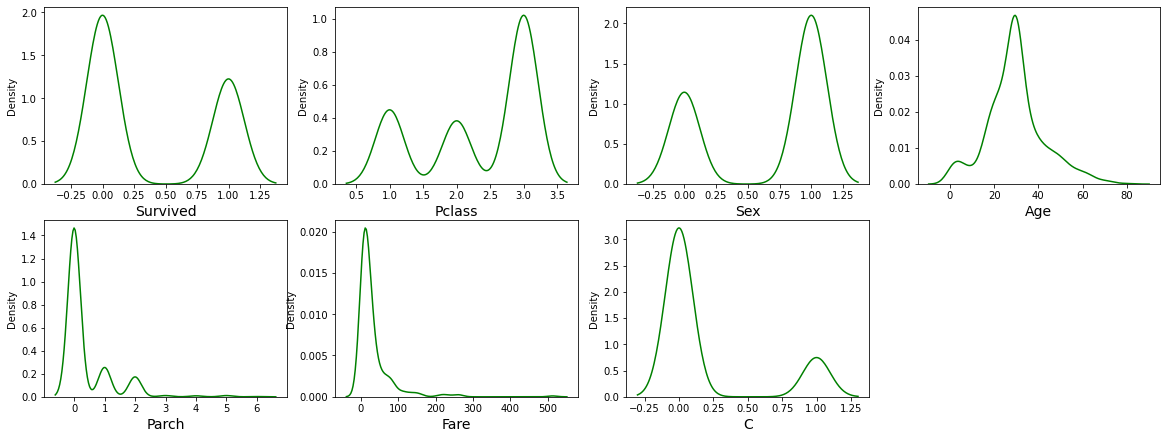

In [51]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in df_enc.columns:
    if plotnum<=8:
        plt.subplot(4,4,plotnum)
        sns.kdeplot(df_enc[col], color = 'g')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - Parch and Fare have high skewness. we need to treat it

# Checking Outliers

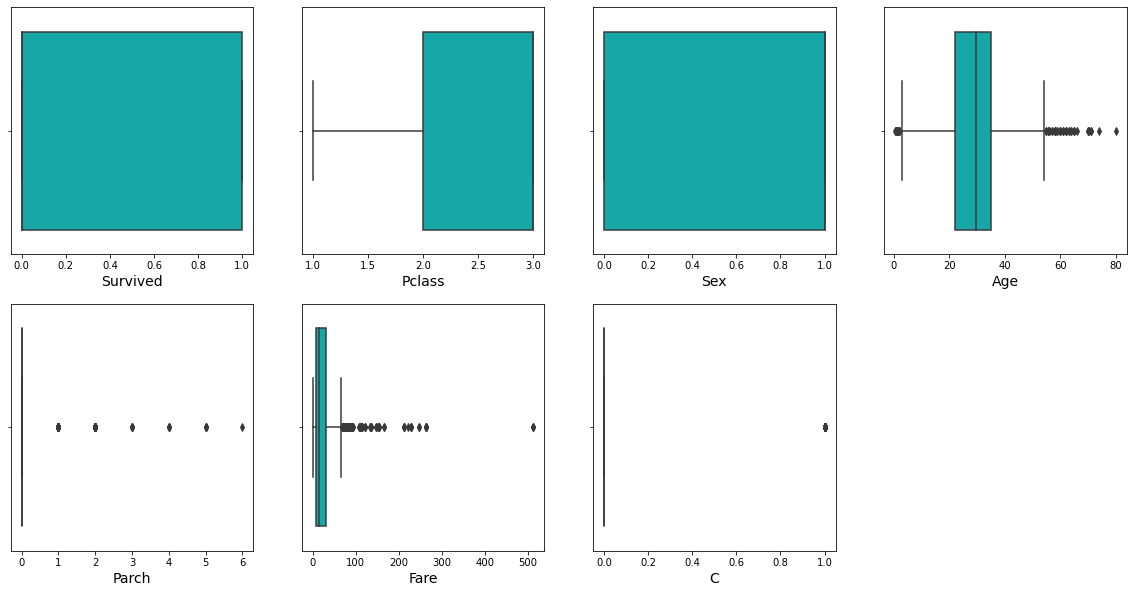

In [52]:
plt.figure(figsize=(20,10),facecolor='white')
plotnum=1
for col in df_enc.columns:
    if plotnum<=7:
        plt.subplot(2,4,plotnum)
        sns.boxplot(df_enc[col], color='c')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - as expected some feature variables have outliers. lets treat them with the help of z score method

# Removing Outliers

In [53]:
#using z-score method
from scipy.stats import zscore #import zscore from scipy library
zscore(df_enc)

,Survived,Pclass,Sex,Age,Parch,Fare,C
0,-0.789272,0.827377,0.737695,-0.592481,-0.473674,-0.502445,-0.482043
1,1.266990,-1.566107,-1.355574,0.638789,-0.473674,0.786845,2.074505
2,1.266990,0.827377,-1.355574,-0.284663,-0.473674,-0.488854,-0.482043
3,1.266990,-1.566107,-1.355574,0.407926,-0.473674,0.420730,-0.482043
4,-0.789272,0.827377,0.737695,0.407926,-0.473674,-0.486337,-0.482043
...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,0.737695,-0.207709,-0.473674,-0.386671,-0.482043
887,1.266990,-1.566107,-1.355574,-0.823344,-0.473674,-0.044381,-0.482043
888,-0.789272,0.827377,-1.355574,0.000000,2.008933,-0.176263,-0.482043
889,1.266990,-1.566107,0.737695,-0.284663,-0.473674,-0.044381,2.074505


In [54]:
z = np.abs(zscore(df_enc))
z.shape

(891, 7)

In [55]:
np.where(z>3) #detecting outliers where z>3

(array([ 13,  25,  27,  86,  88,  96, 116, 118, 167, 258, 299, 311, 341,
        360, 377, 380, 437, 438, 438, 493, 527, 557, 567, 610, 630, 638,
        672, 678, 679, 689, 700, 716, 730, 736, 737, 742, 745, 774, 779,
        851, 858, 885], dtype=int64),
 array([4, 4, 5, 4, 5, 3, 3, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 3, 5, 5,
        4, 4, 3, 4, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 3, 4, 5, 3, 4, 4],
       dtype=int64))

In [56]:
z.iloc[27] #checking one of the detected outliers

Survived    0.789272
Pclass      1.566107
Sex         0.737695
Age         0.823344
Parch       2.008933
Fare        4.647001
C           0.482043
Name: 27, dtype: float64

In [57]:
#checking total number of rows where z>3
len(np.where(z>3)[0])

42

In [58]:
#removing outliers

df_new = df_enc[(z<3).all(axis=1)]

print("Old Data Frame:",df_enc.shape)
print("New Data Frame:",df_new.shape)
print("Total Dropped Rows:",df_enc.shape[0] - df_new.shape[0])

Old Data Frame: (891, 7)
New Data Frame: (850, 7)
Total Dropped Rows: 41


In [59]:
#percent loss
percent_loss = 41*100/891
print("Percent Loss: ",percent_loss)

Percent Loss:  4.601571268237935


There is a total 4.6% data loss which is acceptable.

In [64]:
df_new

,Survived,Pclass,Sex,Age,Parch,Fare,C
0,0,3,1,22.000000,0,7.2500,0
1,1,1,0,38.000000,0,71.2833,1
2,1,3,0,26.000000,0,7.9250,0
3,1,1,0,35.000000,0,53.1000,0
4,0,3,1,35.000000,0,8.0500,0
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,13.0000,0
887,1,1,0,19.000000,0,30.0000,0
888,0,3,0,29.699118,2,23.4500,0
889,1,1,1,26.000000,0,30.0000,1


# Checking Outliers again using boxplot

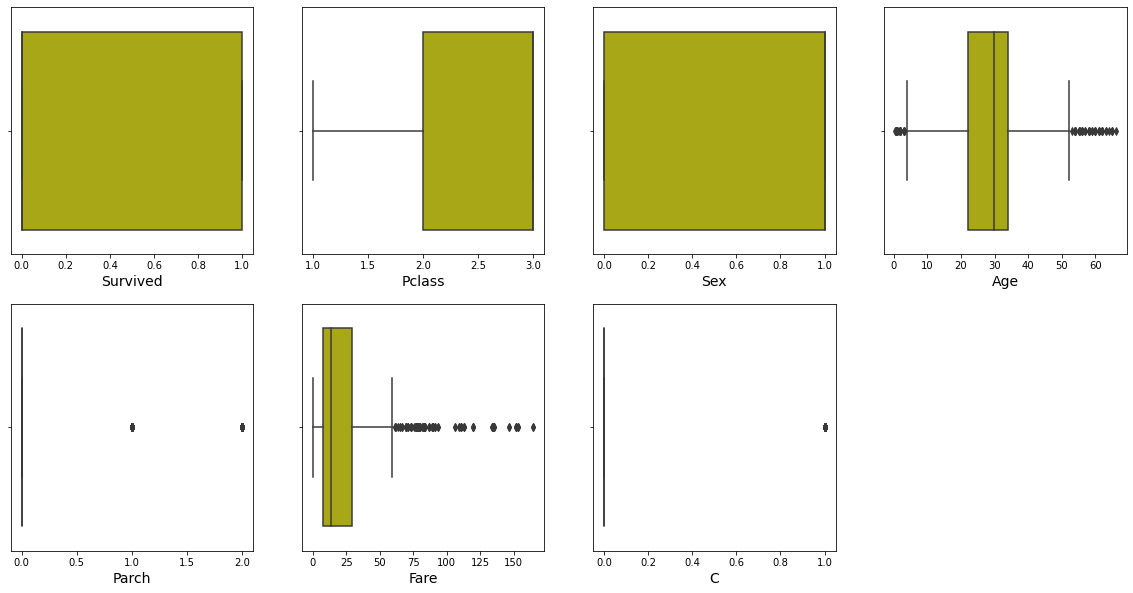

In [65]:
plt.figure(figsize=(20,10),facecolor='white')
plotnum=1
for col in df_new.columns:
    if plotnum<=8:
        plt.subplot(2,4,plotnum)
        sns.boxplot(df_new[col], color='y')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - outliers have been treated to some extent. Lets implement IQR method to treat outliers

# Treating Outliers using IQR method

In [66]:
X = df_new.drop('Survived', axis=1)
Y = df_new['Survived']
#create new dataframe
X_new = pd.DataFrame()
X_new

""


In [72]:
def detect_and_treat_outliers_iqr(data):
    new_list = []
    #data = sorted(data)
    
    median = mode(data)# calculating mode

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            i = median    #replacing outlier with mode
        new_list.append(i)
    return new_list 


for col in X.columns:
    X_new[col] = detect_and_treat_outliers_iqr(X[col])
    
X_new

,Pclass,Sex,Age,Parch,Fare,C
0,3,1,22.000000,0,7.250,0
1,1,0,38.000000,0,8.050,0
2,3,0,26.000000,0,7.925,0
3,1,0,35.000000,0,53.100,0
4,3,1,35.000000,0,8.050,0
...,...,...,...,...,...,...
845,2,1,27.000000,0,13.000,0
846,1,0,19.000000,0,30.000,0
847,3,0,29.699118,0,23.450,0
848,1,1,26.000000,0,30.000,0


In the above method we detected the Outliers using IQR method and replaced them with mode

# Ploting Boxplot

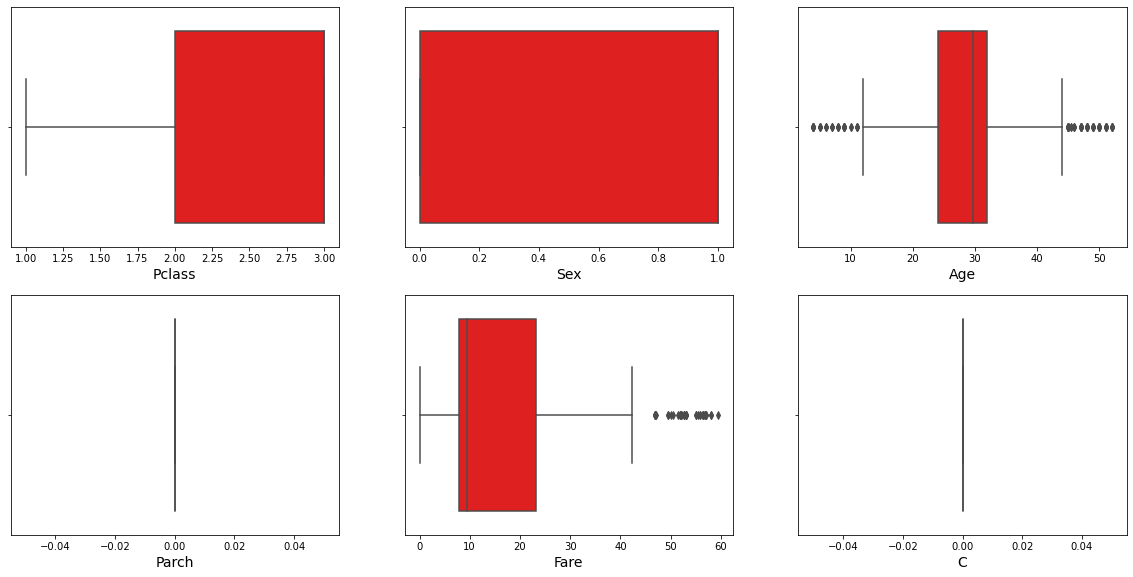

In [73]:
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for col in X_new.columns:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.boxplot(X_new[col], color='r')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Remaining outliers can be treated with Transformation method later on

# Balancing Target Variable

In [74]:
Y.value_counts()

0    527
1    323
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

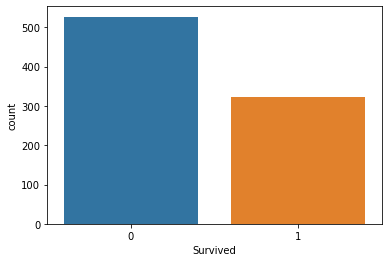

In [76]:
sns.countplot(Y)

Observation - as the target data is little inbalanced we need to balance that first before proceeding further

In [77]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,Y = smt.fit_resample(X_new,Y,)
X,Y

(      Pclass  Sex        Age  Parch       Fare  C
 0          3    1  22.000000      0   7.250000  0
 1          1    0  38.000000      0   8.050000  0
 2          3    0  26.000000      0   7.925000  0
 3          1    0  35.000000      0  53.100000  0
 4          3    1  35.000000      0   8.050000  0
 ...      ...  ...        ...    ...        ... ..
 1049       2    0  29.052757      0  26.000000  0
 1050       3    0  22.186210      0   7.305863  0
 1051       2    0  29.289987      0  26.000000  0
 1052       3    0  29.699118      0  15.892077  0
 1053       3    1  44.818222      0   8.027278  0
 
 [1054 rows x 6 columns],
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 1049    1
 1050    1
 1051    1
 1052    1
 1053    1
 Name: Survived, Length: 1054, dtype: int64)

In [78]:
X.shape

(1054, 6)

In [79]:
Y.shape

(1054,)

<AxesSubplot:xlabel='Survived', ylabel='count'>

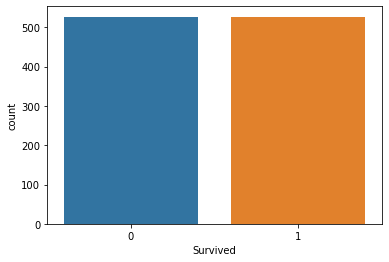

In [80]:
sns.countplot(Y)

Target data has been balanced using SMOTE

# Transforming data to remove skewness further (Power Transform)

In [82]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
type(X)
X

array([[ 0.94192202,  0.8732364 , -0.7550926 ,  0.        , -0.79886508,
         0.        ],
       [-1.30081914, -1.14516528,  0.96767464,  0.        , -0.65558438,
         0.        ],
       [ 0.94192202, -1.14516528, -0.32245617,  0.        , -0.67708848,
         0.        ],
       ...,
       [-0.60735794, -1.14516528,  0.03276404,  0.        ,  0.976812  ,
         0.        ],
       [ 0.94192202, -1.14516528,  0.07684146,  0.        ,  0.29129974,
         0.        ],
       [ 0.94192202,  0.8732364 ,  1.69708131,  0.        , -0.6594704 ,
         0.        ]])

In [83]:
X.ndim

2

In [84]:
X.mean()

3.6515874307721785e-17

In [85]:
X.std()

0.816496580927726

mean = 0 and Standard deviation = 0.81

In [86]:
X.shape

(1054, 6)

# Feature Scaling using Standard Scaler

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X

,0,1,2,3,4,5
0,0.941922,0.873236,-0.755093,0.0,-0.798865,0.0
1,-1.300819,-1.145165,0.967675,0.0,-0.655584,0.0
2,0.941922,-1.145165,-0.322456,0.0,-0.677088,0.0
3,-1.300819,-1.145165,0.646272,0.0,1.978302,0.0
4,0.941922,0.873236,0.646272,0.0,-0.655584,0.0
...,...,...,...,...,...,...
1049,-0.607358,-1.145165,0.007195,0.0,0.976812,0.0
1050,0.941922,-1.145165,-0.734955,0.0,-0.788404,0.0
1051,-0.607358,-1.145165,0.032764,0.0,0.976812,0.0
1052,0.941922,-1.145165,0.076841,0.0,0.291300,0.0


# Model Building

I will train the follwoing models -
- A. Logistic Regression
- B. Decision Trees
- C. Random Forests
- D. SVC linear kernel
- E. SGD Classifier
- F. KNN (K_nearest_neighbors)
- G. AdaBoost Classifier
- H. Gradiant Boost Classifier
- I. Bagging Classifier

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Finding best Random State

In [89]:
#Choosing the best random state for our ML Model
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    acc_train = accuracy_score(y_train,pred_train)
    acc_test = accuracy_score(y_test,pred_test)
    
    if acc_test > maxAccu:
        maxAccu = acc_test
        maxRS = i
print('training accuracy :',acc_train,'test accuracy is :',acc_test,'random_state is:',i)

training accuracy : 0.7947805456702254 test accuracy is : 0.7772511848341233 random_state is: 199


So Logistic regression is showing best accuracy score at 199 random stage

# Creating the Training and Testing data set

In [90]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=199, test_size=0.20)

#creating models empty dataframe
models_df = pd.DataFrame() 

# Machine Learning Model

In [96]:
def reg_func(model, X, Y, model_name,sc):    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    #classification report
    print('Classification Report :\n',classification_report(y_test,pred))
    
    #confusion matrix
    conf = confusion_matrix(y_test, pred)
    tp = conf[0,0]
    fp = conf[0,1]
    tn = conf[1,1]
    fn = conf[1,0]
    sns.heatmap(conf, annot=True)
    
    #accracy score
    acs = accuracy_score(y_test,pred)
    print('Accuracy :',acs)
    
    #cross validation score
    cvs = cross_val_score(model,X,Y,cv=4).mean()
    print('Cross validation score :',cvs)
    
    #difference in accuracy and cross validation score
    diff = abs(acs - cvs)
    print('Accuracy and CV Score Diff :', diff)
    
    #ROC Score
    rocs = roc_auc_score(y_test,pred)
    print("ROC AUC Score :", rocs)
    
    #ROC AUC curve
    fpr,tpr,threshold = roc_curve(y_test, model.predict(x_test))
    plt.figure(figsize=(5,5),facecolor='white')    
    plt.plot(fpr,tpr,label=model_name)
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic")
    plt.show()
    
    #appending data to dataframe
    models_df[sc] = [model_name, acs, cvs, diff, tp, fp, fn, tn, rocs,fpr,tpr]
        
    plt.figure(figsize=(5,5))
    plt.scatter(x=y_test, y=pred_test, color='r')
    plt.plot(y_test,y_test, color='b')
    plt.xlabel('Actual Survival', fontsize = 14)
    plt.ylabel('Predicted Survival', fontsize = 14)
    plt.show()

# Logistic Regression

Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.88      0.78        96
           1       0.87      0.70      0.77       115

    accuracy                           0.78       211
   macro avg       0.79      0.79      0.78       211
weighted avg       0.80      0.78      0.78       211

Accuracy : 0.7772511848341233
Cross validation score : 0.7875475285171103
Accuracy and CV Score Diff : 0.010296343682987041
ROC AUC Score : 0.7853260869565217


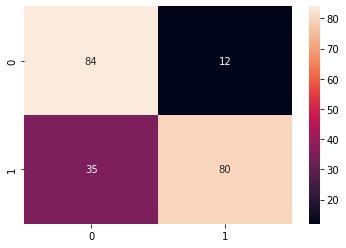

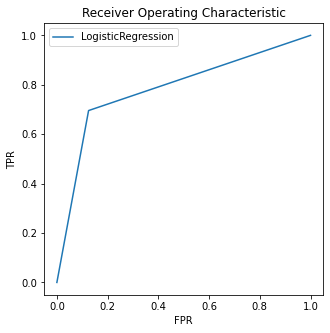

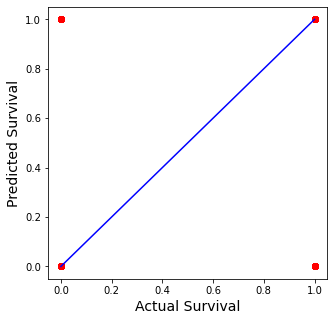

In [97]:
reg_func(LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000, random_state=199),X,Y, 'LogisticRegression','lr')

# Decision Tree Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.82      0.76        96
           1       0.83      0.70      0.76       115

    accuracy                           0.76       211
   macro avg       0.76      0.76      0.76       211
weighted avg       0.77      0.76      0.76       211

Accuracy : 0.7582938388625592
Cross validation score : 0.7961026615969582
Accuracy and CV Score Diff : 0.037808822734399006
ROC AUC Score : 0.7636322463768116


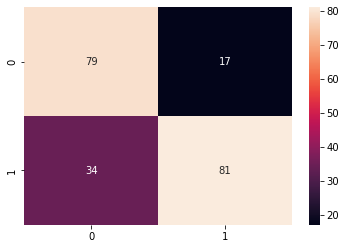

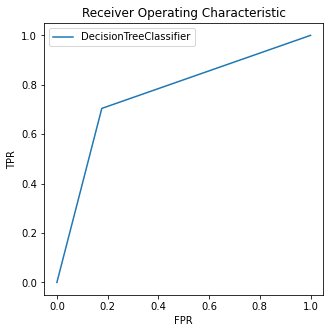

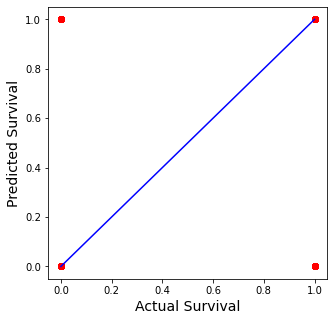

In [98]:
from sklearn.tree import DecisionTreeClassifier
reg_func(DecisionTreeClassifier(criterion = 'entropy'), X, Y, 'DecisionTreeClassifier','dtc')

# Random Forests

Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.84      0.80        96
           1       0.86      0.77      0.81       115

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211

Accuracy : 0.8056872037914692
Cross validation score : 0.8169575988017053
Accuracy and CV Score Diff : 0.011270395010236078
ROC AUC Score : 0.8088315217391304


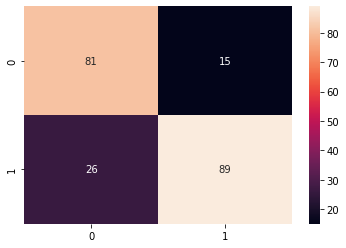

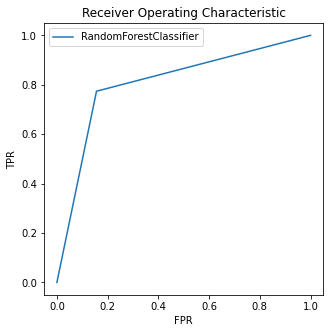

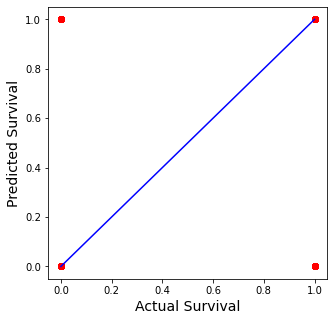

In [99]:
from sklearn.ensemble import RandomForestClassifier
reg_func(RandomForestClassifier(criterion = 'entropy'), X, Y,'RandomForestClassifier','rfc')

# SVM Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        96
           1       0.87      0.69      0.77       115

    accuracy                           0.77       211
   macro avg       0.78      0.78      0.77       211
weighted avg       0.79      0.77      0.77       211

Accuracy : 0.7725118483412322
Cross validation score : 0.7922823770019587
Accuracy and CV Score Diff : 0.019770528660726483
ROC AUC Score : 0.7809782608695652


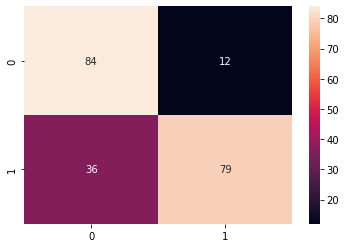

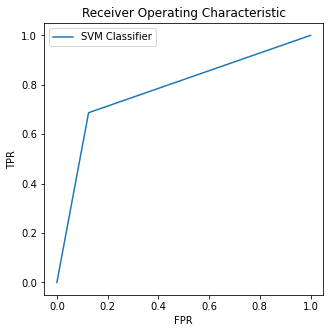

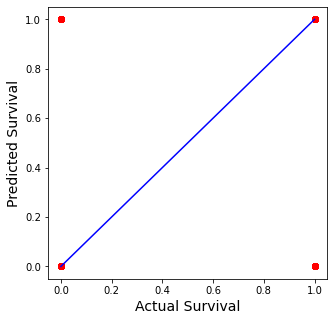

In [100]:
from sklearn.svm import SVC
reg_func(SVC(kernel='linear'),X,Y,'SVM Classifier','svmc')

# SGD Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.57      0.65        96
           1       0.70      0.84      0.77       115

    accuracy                           0.72       211
   macro avg       0.73      0.71      0.71       211
weighted avg       0.73      0.72      0.71       211

Accuracy : 0.7203791469194313
Cross validation score : 0.7913282060145177
Accuracy and CV Score Diff : 0.07094905909508642
ROC AUC Score : 0.708197463768116


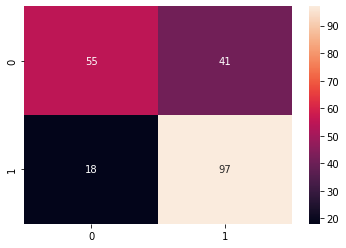

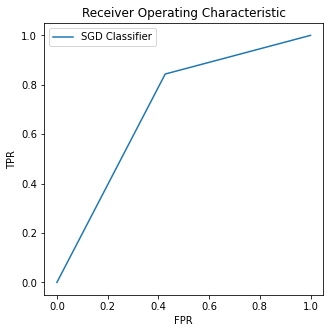

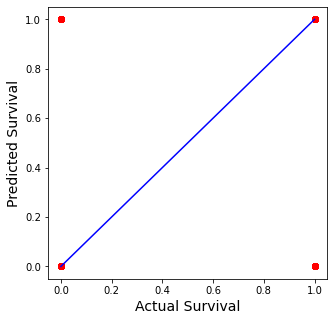

In [101]:
from sklearn.linear_model import SGDClassifier
reg_func(SGDClassifier(penalty=None),X,Y,'SGD Classifier','sgdc')

# KNN (k Nearest Neighbour)

Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.85      0.80        96
           1       0.86      0.76      0.81       115

    accuracy                           0.80       211
   macro avg       0.80      0.81      0.80       211
weighted avg       0.81      0.80      0.80       211

Accuracy : 0.8009478672985783
Cross validation score : 0.815052857472059
Accuracy and CV Score Diff : 0.01410499017348077
ROC AUC Score : 0.8053442028985507


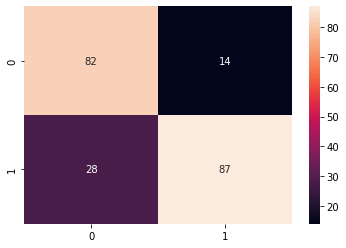

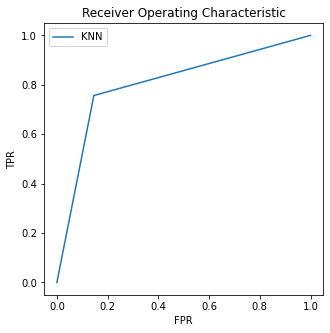

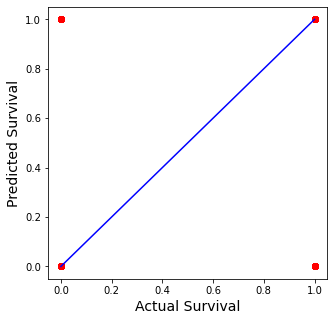

In [102]:
from sklearn.neighbors import KNeighborsClassifier
reg_func(KNeighborsClassifier(weights = 'distance'),X,Y,'KNN','knn')

# ADA Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        96
           1       0.83      0.79      0.81       115

    accuracy                           0.80       211
   macro avg       0.80      0.80      0.80       211
weighted avg       0.80      0.80      0.80       211

Accuracy : 0.8009478672985783
Cross validation score : 0.7941871183316049
Accuracy and CV Score Diff : 0.006760748966973318
ROC AUC Score : 0.8019021739130434


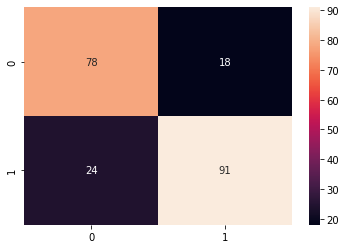

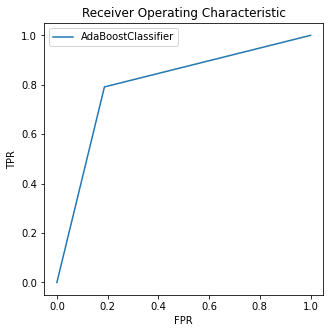

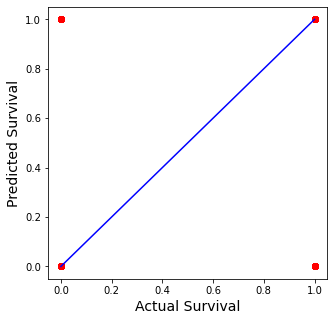

In [103]:
from sklearn.ensemble import AdaBoostClassifier
reg_func(AdaBoostClassifier(), X,Y,'AdaBoostClassifier','abc')

# Gradient Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.89      0.81        96
           1       0.89      0.74      0.81       115

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.82      0.81      0.81       211

Accuracy : 0.8056872037914692
Cross validation score : 0.8188443369051733
Accuracy and CV Score Diff : 0.013157133113704145
ROC AUC Score : 0.8122735507246377


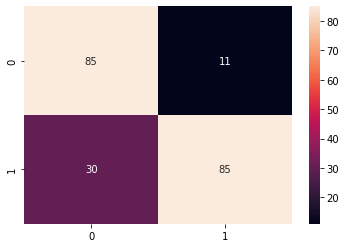

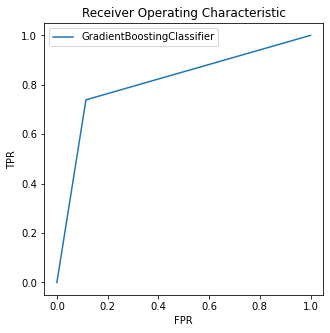

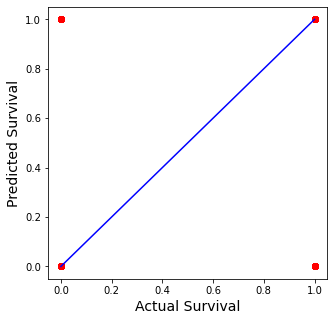

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
reg_func(GradientBoostingClassifier(),X,Y,'GradientBoostingClassifier','gbc')

# Bagging Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        96
           1       0.87      0.73      0.79       115

    accuracy                           0.79       211
   macro avg       0.80      0.80      0.79       211
weighted avg       0.80      0.79      0.79       211

Accuracy : 0.7914691943127962
Cross validation score : 0.7961026615969582
Accuracy and CV Score Diff : 0.0046334672841620295
ROC AUC Score : 0.7975090579710145


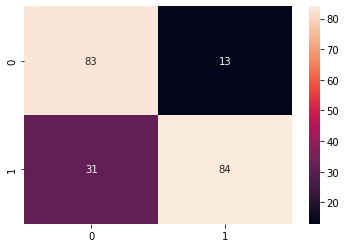

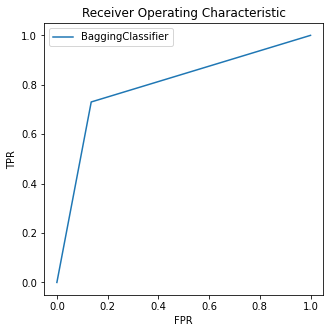

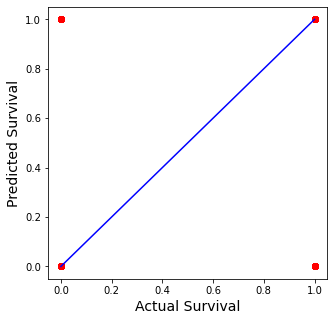

In [105]:
from sklearn.ensemble import BaggingClassifier

reg_func(BaggingClassifier(),X,Y,'BaggingClassifier','bc')

In [106]:
model_stats = models_df.transpose()
model_stats

,0,1,2,3,4,5,6,7,8,9,10
lr,LogisticRegression,0.777251,0.787548,0.010296,84,12,35,80,0.785326,"[0.0, 0.125, 1.0]","[0.0, 0.6956521739130435, 1.0]"
dtc,DecisionTreeClassifier,0.758294,0.796103,0.037809,79,17,34,81,0.763632,"[0.0, 0.17708333333333334, 1.0]","[0.0, 0.7043478260869566, 1.0]"
rfc,RandomForestClassifier,0.805687,0.816958,0.01127,81,15,26,89,0.808832,"[0.0, 0.15625, 1.0]","[0.0, 0.7739130434782608, 1.0]"
svmc,SVM Classifier,0.772512,0.792282,0.019771,84,12,36,79,0.780978,"[0.0, 0.125, 1.0]","[0.0, 0.6869565217391305, 1.0]"
sgdc,SGD Classifier,0.720379,0.791328,0.070949,55,41,18,97,0.708197,"[0.0, 0.4270833333333333, 1.0]","[0.0, 0.8434782608695652, 1.0]"
knn,KNN,0.800948,0.815053,0.014105,82,14,28,87,0.805344,"[0.0, 0.14583333333333334, 1.0]","[0.0, 0.7565217391304347, 1.0]"
abc,AdaBoostClassifier,0.800948,0.794187,0.006761,78,18,24,91,0.801902,"[0.0, 0.1875, 1.0]","[0.0, 0.7913043478260869, 1.0]"
gbc,GradientBoostingClassifier,0.805687,0.818844,0.013157,85,11,30,85,0.812274,"[0.0, 0.11458333333333333, 1.0]","[0.0, 0.7391304347826086, 1.0]"
bc,BaggingClassifier,0.791469,0.796103,0.004633,83,13,31,84,0.797509,"[0.0, 0.13541666666666666, 1.0]","[0.0, 0.7304347826086957, 1.0]"


In [107]:
model_stats.columns = ['Model','Accuracy Score', 'Cross Validation Score', 'Difference','True +ve', 'False +ve', 'False -ve', 'True -ve','ROC Score','FPR','TPR']
model_stats

,Model,Accuracy Score,Cross Validation Score,Difference,True +ve,False +ve,False -ve,True -ve,ROC Score,FPR,TPR
lr,LogisticRegression,0.777251,0.787548,0.010296,84,12,35,80,0.785326,"[0.0, 0.125, 1.0]","[0.0, 0.6956521739130435, 1.0]"
dtc,DecisionTreeClassifier,0.758294,0.796103,0.037809,79,17,34,81,0.763632,"[0.0, 0.17708333333333334, 1.0]","[0.0, 0.7043478260869566, 1.0]"
rfc,RandomForestClassifier,0.805687,0.816958,0.01127,81,15,26,89,0.808832,"[0.0, 0.15625, 1.0]","[0.0, 0.7739130434782608, 1.0]"
svmc,SVM Classifier,0.772512,0.792282,0.019771,84,12,36,79,0.780978,"[0.0, 0.125, 1.0]","[0.0, 0.6869565217391305, 1.0]"
sgdc,SGD Classifier,0.720379,0.791328,0.070949,55,41,18,97,0.708197,"[0.0, 0.4270833333333333, 1.0]","[0.0, 0.8434782608695652, 1.0]"
knn,KNN,0.800948,0.815053,0.014105,82,14,28,87,0.805344,"[0.0, 0.14583333333333334, 1.0]","[0.0, 0.7565217391304347, 1.0]"
abc,AdaBoostClassifier,0.800948,0.794187,0.006761,78,18,24,91,0.801902,"[0.0, 0.1875, 1.0]","[0.0, 0.7913043478260869, 1.0]"
gbc,GradientBoostingClassifier,0.805687,0.818844,0.013157,85,11,30,85,0.812274,"[0.0, 0.11458333333333333, 1.0]","[0.0, 0.7391304347826086, 1.0]"
bc,BaggingClassifier,0.791469,0.796103,0.004633,83,13,31,84,0.797509,"[0.0, 0.13541666666666666, 1.0]","[0.0, 0.7304347826086957, 1.0]"


# ROC AUC CURVE for all the Model

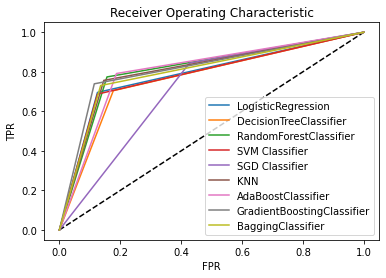

In [108]:
plt.plot([0,1],[0,1], 'k--')
for i in range(0,model_stats.shape[0]):
    plt.plot(model_stats['FPR'][i], model_stats['TPR'][i], label=model_stats['Model'][i])
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic")
plt.show()

Observation - Gradient Boosting Classifier is giving the highest ROC Score 81.22%

# Visualizing Accuracy Score for all Models

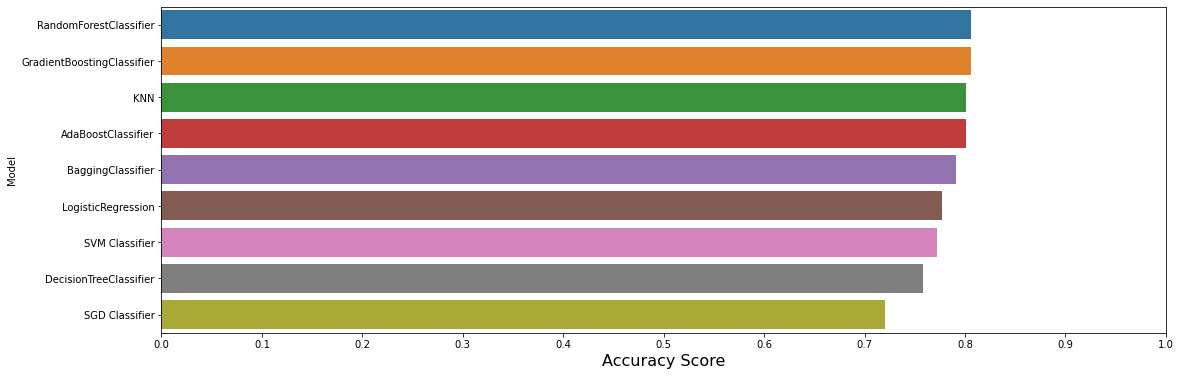

In [109]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

sns.barplot(x='Accuracy Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest Classifier and Gradient Boost Classifier are giving the highest Accuracy score 80.56%

# Visualizing Cross Validation Score for all Models

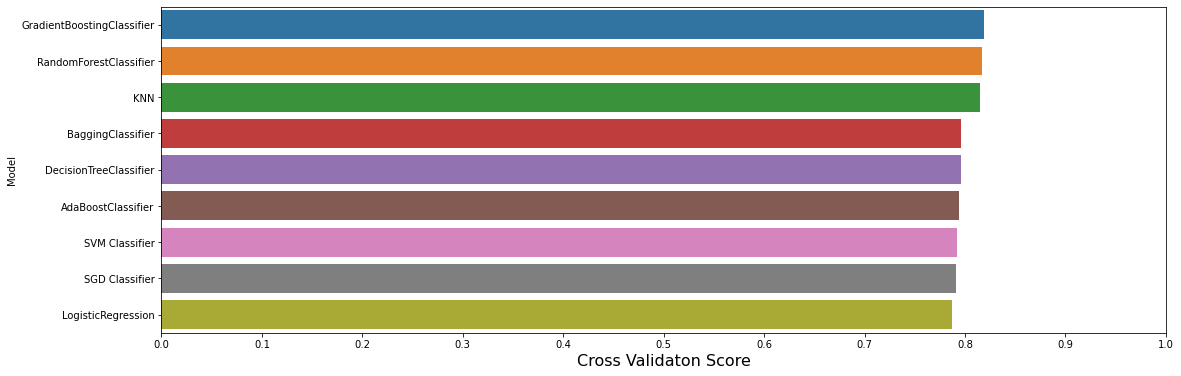

In [110]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Cross Validation Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validation Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Cross Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Gradient Boost Classifier is giving the highest Cross validation Score 81.88%

# Visualizing False Predictions for all Models

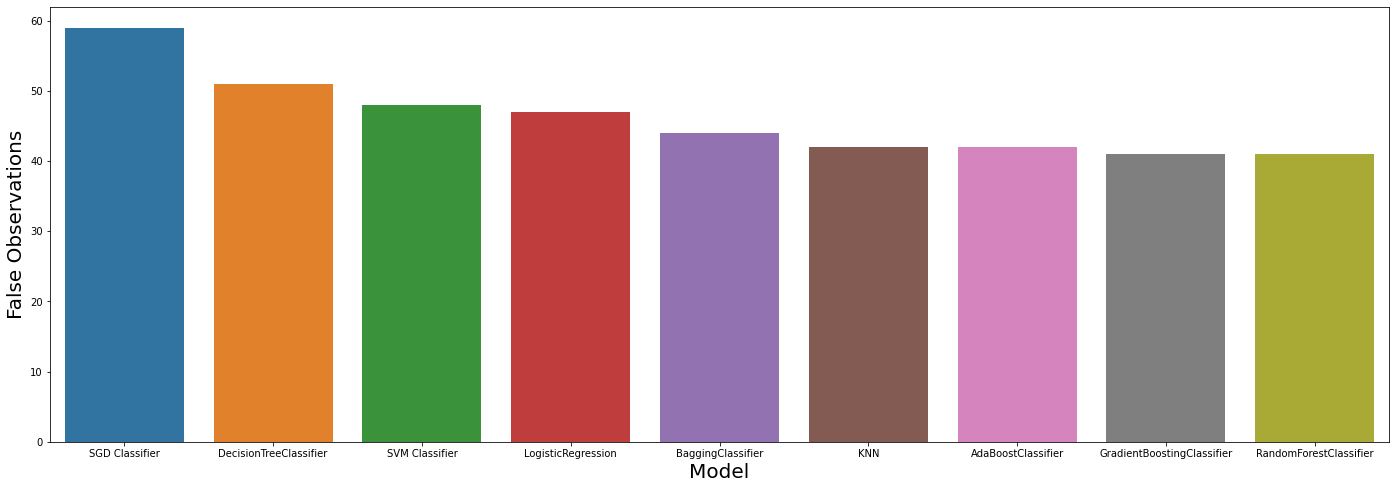

In [112]:
model_stats.sort_values(by=(['Accuracy Score']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = model_stats['Model'], y=model_stats['False +ve'] + model_stats['False -ve'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

Observation - Gradient Boost and Random Forest are giving lowest false predictions

Hence, Gradient Boost Classifier can be choosen as the best model for this problem statement

# Hyper Parameter Tuning with Gradient Boost Classifier

In [115]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy','friedman_mse'],'max_depth':['auto',2,4,6,8,10],'learning_rate':[0.01,0.1,1,10,100],'n_estimators':list(range(0,100))}
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 95}

Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.86      0.80        96
           1       0.87      0.75      0.80       115

    accuracy                           0.80       211
   macro avg       0.80      0.81      0.80       211
weighted avg       0.81      0.80      0.80       211

Accuracy : 0.8009478672985783
Cross validation score : 0.8226394169835234
Accuracy and CV Score Diff : 0.021691549684945133
ROC AUC Score : 0.8062047101449277


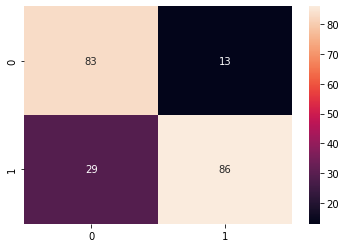

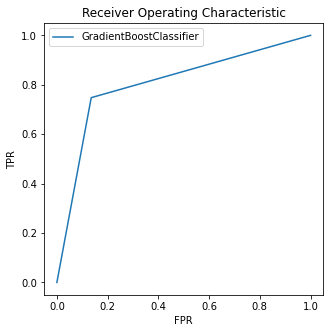

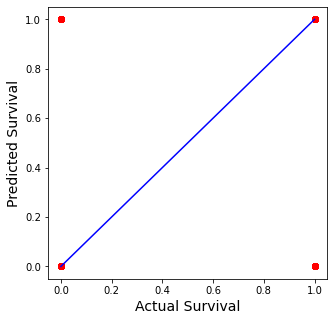

In [118]:
GCV.best_estimator_
rfc = GradientBoostingClassifier(criterion = 'friedman_mse',learning_rate = 0.1, max_depth = 4, n_estimators = 95) 
reg_func(rfc, X, Y,'GradientBoostClassifier','rfc')

# Saving the Model

In [117]:
import pickle
filename = 'titanic_sink_survival_prediction.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

In [119]:
loaded_model = pickle.load(open('titanic_sink_survival_prediction.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

80.09478672985783


Accuracy Score - 80.1%

In [120]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
Predicted,1,1,1,1,1,0,0,0,1,1,...,0,1,1,1,0,1,1,0,0,0
Original,1,1,1,1,1,0,0,0,1,1,...,0,0,1,1,0,1,1,0,0,0


# This model is 80.1% accurate